In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

# Difference

y(x)=exp(-x); dy/dx=-y; y(0)=1;

In [2]:
'''
def f_all(h,step,ax):
    x_minus = [0]
    x_plus = [0]
    y_minus = [1]
    y_plus = [1]
    for i in np.ar ange(0,step):
        x_minus.insert(0, x_minus[0]-h)
        x_plus.append(x_plus[-1]+h)
        y_minus.insert(0, (1+h)*y_minus[0])
        y_plus.append((1-h)*y_plus[-1])
    x_vars = x_minus+x_plus[1:]
    y_vars = y_minus+y_plus[1:]
    f_vars = [x_vars, y_vars, [math.exp(-i) for i in x_vars]]
    return f_vars
'''

'\ndef f_all(h,step,ax):\n    x_minus = [0]\n    x_plus = [0]\n    y_minus = [1]\n    y_plus = [1]\n    for i in np.ar ange(0,step):\n        x_minus.insert(0, x_minus[0]-h)\n        x_plus.append(x_plus[-1]+h)\n        y_minus.insert(0, (1+h)*y_minus[0])\n        y_plus.append((1-h)*y_plus[-1])\n    x_vars = x_minus+x_plus[1:]\n    y_vars = y_minus+y_plus[1:]\n    f_vars = [x_vars, y_vars, [math.exp(-i) for i in x_vars]]\n    return f_vars\n'

In [3]:
def f_plus(h, step, ax):
    x_plus = [0]
    y_plus = [1]
    for i in np.arange(0, step):
        x_plus.append(x_plus[-1]+h)
        y_plus.append(y_plus[-1]*(1-h))
    f_vars = [x_plus, y_plus, [math.exp(-i) for i in x_plus]]
    k = len(x_plus)//2
    if h == 0.01:
        ax.plot(f_vars[0][k:], f_vars[1][k:], '-r',label='Euler method')
        ax.plot(f_vars[0][k:], f_vars[2][k:], '-.b',label='exp(-x)')
    else:
        ax.plot(f_vars[0][k:], f_vars[1][k:], '-r')
        ax.plot(f_vars[0][k:], f_vars[2][k:], '-.b')
    return f_vars

def f_minus(h, step, ax):
    x_minus = [0]
    y_mlnus = [1]
    for i in np.arange(0, step):
        x_minus.append(x_minus[-1]+h)
        y_mlnus.append(y_mlnus[-1]/(1+h))
    f_vars = [x_minus, y_mlnus, [math.exp(-i) for i in x_minus]]
    k = len(x_minus)//2
    ax.plot(f_vars[0][k:], f_vars[1][k:], '-r')
    ax.plot(f_vars[0][k:], f_vars[2][k:], '-.b')
    return f_vars

def f_central(h,step,ax):
    x_central=[0,h]
    y_central=[1,math.exp(-h)]
    for i in np.arange(0, step):
        x_central.append(x_central[-1]+h)
        y_central.append(y_central[-2] - y_central[-1]*2*h)
    f_vars = [x_central, y_central, [math.exp(-i) for i in x_central]]
    k = len(x_central)//2-1
    ax.plot(f_vars[0][k:], f_vars[1][k:], '-r')
    ax.plot(f_vars[0][k:], f_vars[2][k:], '-.b')
    return f_vars


## figure

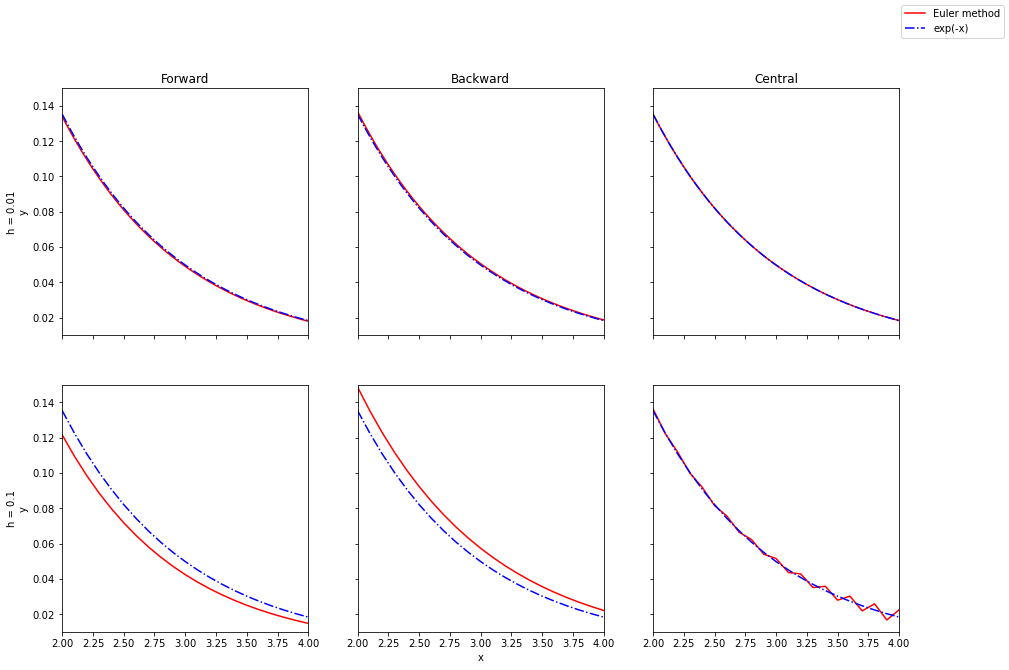

In [9]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True,sharex=True,figsize=(15,10))

fp1 = f_plus(0.01,400,axs[0,0])
fm1 = f_minus(0.01, 400, axs[0, 1])
fc1 = f_central(0.01, 400, axs[0, 2])
fp2 = f_plus(0.1, 40, axs[1, 0])
fm2 = f_minus(0.1, 40, axs[1, 1])
fc2 = f_central(0.1, 40, axs[1, 2])
fig.legend()
axs[0,0].set_title('Forward')
axs[0,1].set_title('Backward')
axs[0,2].set_title('Central')
axs[0,0].set_ylabel('h = 0.01\ny')
axs[1,0].set_ylabel('h = 0.1\ny')
axs[1,1].set_xlabel('x')
axs[0,0].set_xlim([2,4])
axs[0, 0].set_ylim([0.01, 0.15])
fig.savefig('Euler Method.jpeg',dpi=200)

# Runge-Kutte

f(x,y)=dy/dx=-y;    y=exp(-x)

In [5]:
def f(y):
    return(-y)

order:

In [6]:
def second_order(y0,h):
    k1=h*f(y0)
    k2=h*f(y0+k1)
    y1=y0+(k1+k2)/2 
    return(y1)

def third_order(y0,h):
    k1 = h*f(y0)
    k2 = h*f(y0+k1/4)
    k3=h*f(y0+2*(4*k2-k1)/9)
    y1=y0+(k1+3*k3)/4
    return(y1)

def fourth_order(y0,h):
    k1=h*f(y0)
    k2=h*f(y0+k1/2)
    k3=h*f(y0+k2/2)
    k4=h*f(y0+k3)
    y1=y0+(k1+2*k2+2*k3+k4)/6
    return(y1)

RungeKutte:

In [7]:
def rungeKutte(h, step, order):
    x_plus = [0]
    y_plus = [1]
    if order==2:
        for i in np.arange(0, step):
            x_plus.append(x_plus[-1]+h)
            y_plus.append(second_order(y_plus[-1],h))
    elif order==3:
         for i in np.arange(0, step):
            x_plus.append(x_plus[-1]+h)
            y_plus.append(third_order(y_plus[-1], h))
    elif order==4:
        for i in np.arange(0, step):
            x_plus.append(x_plus[-1]+h)
            y_plus.append(fourth_order(y_plus[-1], h))
    f_vars = [x_plus, y_plus, [math.exp(-i) for i in x_plus]]
    return f_vars


## figure

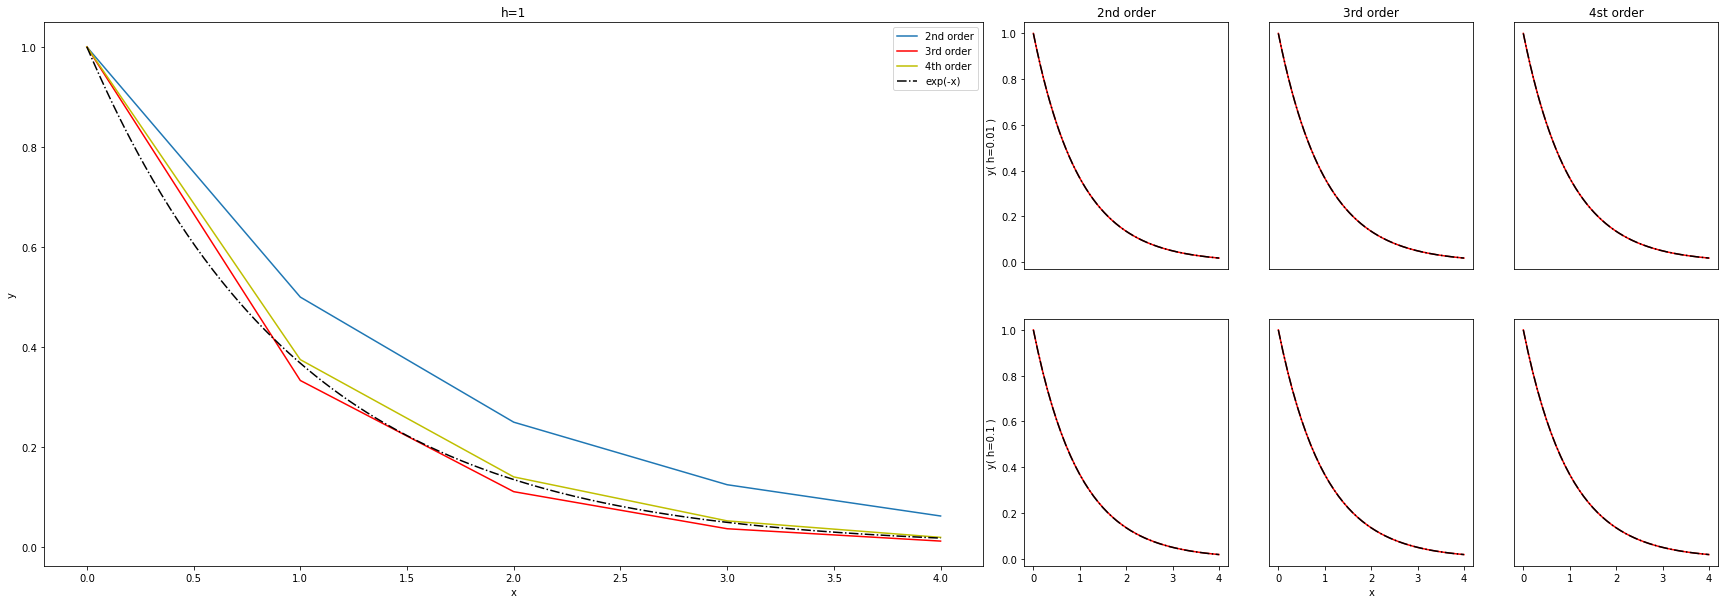

In [11]:
plt.figure(figsize=(30,10))
gs = gridspec.GridSpec(2,7)
ax0 = plt.subplot(gs[:,:4])

f1=rungeKutte(1,4,2)
ax0.plot(f1[0],f1[1],label='2nd order')
f2 = rungeKutte(1, 4, 3)
ax0.plot(f2[0], f2[1], 'r',label='3rd order')
f3 = rungeKutte(1, 4, 4)
ax0.plot(f3[0], f3[1], 'y',label = '4th order')
f4 = rungeKutte(0.01, 400, 3)
ax0.plot(f4[0], f4[2], '-.k',label='exp(-x)')
ax0.set_title('h=1')
ax0.set_xlabel('x')
ax0.set_ylabel('y')
plt.legend()

ax00 = plt.subplot(gs[0,4])
f1 = rungeKutte(0.01, 400, 2)
ax00.plot(f1[0], f1[1], 'r')
ax00.plot(f1[0], f1[2], '-.k')
ax00.set_ylabel('y( h=0.01 )')
ax00.set_title('2nd order')
ax00.set_xticks(())

ax01 = plt.subplot(gs[0,5])
f1 = rungeKutte(0.01, 400, 3)
ax01.plot(f1[0], f1[1], 'r')
ax01.plot(f1[0], f1[2], '-.k')
ax01.set_title('3rd order')
ax01.set_xticks(())
ax01.set_yticks(())

ax02 = plt.subplot(gs[0,6])
f1 = rungeKutte(0.01, 400, 4)
ax02.plot(f1[0], f1[1], 'r')
ax02.plot(f1[0], f1[2], '-.k')
ax02.set_title('4st order')
ax02.set_xticks(())
ax02.set_yticks(())

ax10 = plt.subplot(gs[1, 4])
f1 = rungeKutte(0.1, 40, 2)
ax10.plot(f1[0], f1[1], 'r')
ax10.plot(f1[0], f1[2], '-.k')
ax10.set_ylabel('y( h=0.1 )')

ax11 = plt.subplot(gs[1, 5])
f1 = rungeKutte(0.1, 40, 3)
ax11.plot(f1[0], f1[1], 'r')
ax11.plot(f1[0], f1[2], '-.k')
ax11.set_xlabel('x')
ax11.set_yticks(())

ax12 = plt.subplot(gs[1, 6])
f1 = rungeKutte(0.1, 40, 4)
ax12.plot(f1[0], f1[1], 'r')
ax12.plot(f1[0], f1[2], '-.k')
ax12.set_yticks(())

plt.savefig('Runge-Kutte.jpeg', dpi=200)
